In [19]:
#importing libraries
from os import path
from keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [3]:
#pre-processing csv file
def preprocessing1(filepath):
    file=pd.read_csv(filepath)
    file=file.sample(frac=1)#shuffling the dataset
    label=file.Class.tolist()
    encoder = LabelEncoder()
    label = encoder.fit_transform(label)#encoding the string attribute of classes to numbers
    file=file.drop(columns=['filename'])
    file=file.drop(columns=['Class'])
    file=file.to_numpy()
    file=np.reshape(file,(file.shape[0],file.shape[1],1))
    return file , label #the final file along with the label

In [4]:
#loading the dataset and label
pitch, label_p=preprocessing1('/home/karrthik/Projects/dnn/csv/pitch.csv')
#carnatic, label_c=preprocessing1(r'E:\New folder\dnn\csv\carnatic_train.csv')
#hindustani, label_h=preprocessing1(r'E:\New folder\dnn\csv\hindustani_train.csv')


In [5]:
#defining the dnn network
mod1=Sequential()    #for shape and size of input layer based on number of columns
mod1.add(LSTM(256,return_sequences=True,input_shape=(26,1)))
mod1.add(LSTM(256,return_sequences=True))
mod1.add(LSTM(128,return_sequences=True))
mod1.add(LSTM(64,return_sequences=True))
mod1.add(LSTM(16))
mod1.add(Dense(12, activation='softmax'))
mod1.summary()
mod1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 26, 256)           264192    
_________________________________________________________________
lstm_1 (LSTM)                (None, 26, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 26, 128)           197120    
_________________________________________________________________
lstm_3 (LSTM)                (None, 26, 64)            49408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense (Dense)                (None, 12)                204       
Total params: 1,041,420
Trainable params: 1,041,420
Non-trainable params: 0
______________________________________________

In [7]:
history=mod1.fit(pitch,label_p,validation_split=0.35, epochs=100)

Epoch 1/100
96/96 [==============================] - 80s 554ms/step - loss: 2.2116 - accuracy: 0.2791 - val_loss: 2.0736 - val_accuracy: 0.2955
Epoch 2/100
96/96 [==============================] - 49s 507ms/step - loss: 2.0368 - accuracy: 0.3078 - val_loss: 2.0882 - val_accuracy: 0.2949
Epoch 3/100
96/96 [==============================] - 49s 508ms/step - loss: 2.0909 - accuracy: 0.2782 - val_loss: 2.0797 - val_accuracy: 0.2949
Epoch 4/100
96/96 [==============================] - 79s 823ms/step - loss: 2.0580 - accuracy: 0.2772 - val_loss: 2.0794 - val_accuracy: 0.2949
Epoch 5/100
96/96 [==============================] - 87s 910ms/step - loss: 2.0839 - accuracy: 0.2855 - val_loss: 2.0776 - val_accuracy: 0.2949
Epoch 6/100
96/96 [==============================] - 85s 888ms/step - loss: 2.0665 - accuracy: 0.3014 - val_loss: 2.0782 - val_accuracy: 0.2949
Epoch 7/100
96/96 [==============================] - 85s 889ms/step - loss: 2.0728 - accuracy: 0.2728 - val_loss: 2.0779 - val_accuracy:

96/96 [==============================] - 84s 877ms/step - loss: 0.2742 - accuracy: 0.8832 - val_loss: 0.5624 - val_accuracy: 0.7949
Epoch 58/100
96/96 [==============================] - 88s 915ms/step - loss: 0.2632 - accuracy: 0.8823 - val_loss: 0.5582 - val_accuracy: 0.7937
Epoch 59/100
96/96 [==============================] - 142s 1s/step - loss: 0.2750 - accuracy: 0.8755 - val_loss: 0.5623 - val_accuracy: 0.7985
Epoch 60/100
96/96 [==============================] - 107s 1s/step - loss: 0.3225 - accuracy: 0.8576 - val_loss: 0.5481 - val_accuracy: 0.8120
Epoch 61/100
96/96 [==============================] - 94s 982ms/step - loss: 0.3168 - accuracy: 0.8578 - val_loss: 0.5777 - val_accuracy: 0.8022
Epoch 62/100
96/96 [==============================] - 88s 922ms/step - loss: 0.2622 - accuracy: 0.8808 - val_loss: 0.5836 - val_accuracy: 0.7937
Epoch 63/100
96/96 [==============================] - 85s 891ms/step - loss: 0.2417 - accuracy: 0.8790 - val_loss: 0.5204 - val_accuracy: 0.8193
Ep

In [ ]:
df=pd.read_csv(r'E:\New folder\dnn\csv\pitch_test.csv')
file = df.copy()
"""for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        file[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)"""
file=file.to_numpy()
test1=np.reshape(file,(file.shape[0],file.shape[1],1))
y_prediction=np.argmax(mod1.predict(test1), axis=-1)
y_prediction

In [ ]:
keras.backend.clear_session()

In [ ]:
mod1.evaluate(train_x,Label_Data_enc, verbose=0)

In [ ]:
#saving the model as a json file with weights in h5 format
model_json = mod1.to_json()
with open(r"E:\New folder\dnn\model\pitch_rnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
mod1.save_weights(r"E:\New folder\dnn\model\pitch_rnn.h5")
print("Saved model to disk")

In [ ]:
#loading the file
json_file = open(r'E:\New folder\dnn\model\pitch_rnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(r"E:\New folder\dnn\model\pitch_rnn.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
pitch_final.evaluate(pitch,label_p, verbose=0)

In [ ]:
#carnatic
#violin, veena, flute
test=pd.read_csv(r'E:\New folder\dnn\csv\veena_test.csv')
#carnatic->confusion matrix
y_prediction_c=np.argmax(carnatic_final.predict(carnatic), axis=-1)




In [ ]:
for i in y_prediction_c:
    if i==0:
        print('flute')
    if i==1:
        print('veena')
    if i==2:
        print('violin')

In [ ]:
#carnatic confusion matrix-run the original dataset for confusion matrix
C=confusion_matrix(label_c, y_prediction_c)
K=((C / C.astype(np.float).sum(axis=1))*100)
for i in range (3):
    print(K[i][i])
K

In [ ]:
for i in y_prediction_h:
    if i//1==0:
        print('bansuri')
    if i//1==1:
        print('santoor')
    if i//1==2:
        print('sarangi')
    if i//1==3:
        print('sarod')
    if i//1==4:
        print('shehnai')
    if i//1==5:
        print('sitar')
    if i//1==6:
        print('violin')
  

In [ ]:
#hindustani 
#bansuri, shehnai, violin, sitar, santoor, sarangi
#test1=pd.read_csv(r'E:\New folder\dnn\csv\sita_test.csv')
y_prediction_h=np.argmax(loaded_model.predict(hindustani), axis=-1)
y_prediction_h

In [ ]:
#hindustani confusion matrix-run the original dataset for confusion matrix
C=confusion_matrix(label_h, y_prediction_h)
K=((C / C.astype(np.float).sum(axis=1))*100)
for i in range (7):
    print(K[i][i])
K

In [10]:
#pitch prediction
#test2=pd.read_csv(r'E:\New folder\dnn\csv\veena_test.csv')#test file
y_prediction_p=np.argmax(mod1.predict(pitch), axis=-1)
y_prediction_p

array([2, 5, 5, ..., 4, 8, 8])

In [ ]:
for i in y_prediction_p:
    if i//1==0:
        print('A')
    if i//1==1:
        print('A#')
    if i//1==2:
        print('B')
    if i//1==3:
        print('C')
    if i//1==4:
        print('C#')
    if i//1==5:
        print('D')
    if i//1==6:
        print('D#')
    if i//1==7:
        print('E')
    if i//1==8:
        print('F')
    if i//1==9:
        print('F#')
    if i//1==10:
        print('G')
    if i//1==11:
        print('G#')

In [11]:
#pitch confusion matrix-run the original dataset for confusion matrix
C=confusion_matrix(label_p, y_prediction_p)
K=((C / C.astype(np.float).sum(axis=1))*100)
for i in range (12):
    print(K[i][i])
K

85.71428571428571
96.76674364896074
92.27053140096618
94.20849420849422
97.2809667673716
88.79821958456974
30.602409638554217
95.88377723970945
95.9349593495935
65.71428571428571
93.61702127659575
90.29850746268657


array([[8.57142857e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.41839763e-02, 0.00000000e+00, 2.42130751e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.67667436e+01, 9.66183575e-01, 3.86100386e-01,
        4.53172205e-01, 4.45103858e-01, 0.00000000e+00, 1.21065375e-01,
        4.06504065e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.61662818e+00, 9.22705314e+01, 7.72200772e-01,
        3.02114804e-01, 2.96735905e-01, 0.00000000e+00, 0.00000000e+00,
        4.06504065e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.61893764e-01, 0.00000000e+00, 9.42084942e+01,
        6.04229607e-01, 6.67655786e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.07852194e+00, 9.66183575e-01, 7.72200772e-01,
        9.72809668e+01, 7.41839763e-02, 2.40963855e-01, 1.21

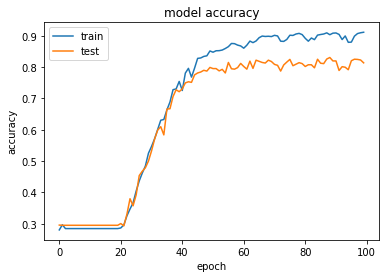

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

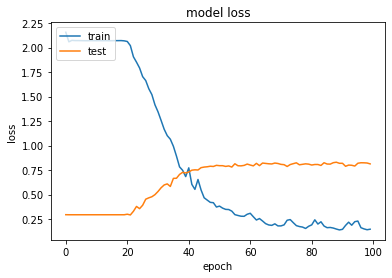

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<AxesSubplot:>

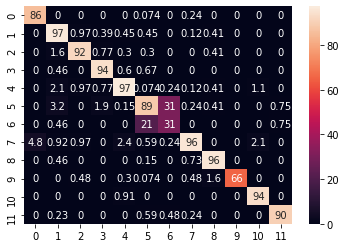

In [18]:
sns.heatmap(K, annot=True)

In [31]:
a=history.history['val_accuracy']

In [50]:
a=[0.2954823076725006,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.29487180709838867,
 0.3003663122653961,
 0.29304030537605286,
 0.3302808403968811,
 0.3797313868999481,
 0.3571428656578064,
 0.3919413983821869,
 0.4536019563674927,
 0.46764346957206726,
 0.47863247990608215,
 0.5,
 0.5323565602302551,
 0.5702075958251953,
 0.598901093006134,
 0.6098901033401489,
 0.583638608455658,
 0.6660561561584473,
 0.6672771573066711,
 0.7063491940498352,
 0.7277167439460754,
 0.721611738204956,
 0.7307692170143127,
 0.7496947646141052,
 0.7533577680587769,
 0.7515262365341187,
 0.7753357887268066,
 0.81440794467926,
 0.8144932675361633,
 0.8299878025054932,
 0.8275458002090454,
 0.84991452813148499,
 0.8354822778701782,
 0.84954822778701782,
 0.8588156270980835,
 0.86930402755737305,
 0.8781440794467926,
 0.8850182962417603,
 0.8948718070983887,
 0.8936508059501648,
 0.8985348105430603,
 0.881965823173523,
 0.8721978139877319,
 0.8936508059501648,
 0.8892918300628662,
 0.87960928082466125,
 0.8623443031311035,
 0.8686812996864319,
 0.8650182962417603,
 0.8531868243217468,
 0.8623443031311035,
 0.8780708289146423,
 0.8589132905006409,
 0.8858608174324036,
 0.8975458002090454,
 0.90070818185806274,
 0.9162392973899841,
 0.9247863054275513,
 0.9046398162841797,
 0.9295238208770752,
 0.9144078254699707,
 0.9113552927970886,
 0.9021978139877319,
 0.907692289352417,
 0.907692289352417,
 0.927924280166626,
 0.9253968358039856,
 0.9125762939453125,
 0.93113552927970886,
 0.9260073065757751,
 0.9308913111686707,
 0.90199023008346558,
 0.908199023008346558,
 0.8947893772721290588,
 0.8928015872836112976,
 0.8937997558116912842,
 0.897918192744255066,
 0.908205128312110901,
 0.908253968358039856,
 0.9128247863054275513,
 0.9128229548335075378,
 0.918137972950935364]


In [29]:
c=[1.6251827478408813,
 1.0479708909988403,
 0.7001164555549622,
 0.555008053779602,
 0.41813498735427856,
 0.38095512986183167,
 0.34063321352005005,
 0.260964572429657,
 0.23584528267383575,
 0.20206931233406067,
 0.18418239057064056,
 0.1772794872522354,
 0.1393066644668579,
 0.13157175481319427,
 0.11992829293012619,
 0.11174345016479492,
 0.1205054447054863,
 0.14205023646354675,
 0.12334411591291428,
 0.04763173684477806,
 0.047464895993471146,
 0.05181586980819702,
 0.0565271931886673,
 0.05611315160989761,
 0.049414850771427155,
 0.04213789314031601,
 0.033670054972171783,
 0.031707089617848396,
 0.039872596487402916,
 0.030072773098945618,
 0.038332678824663162,
 0.027939583957195282,
 0.03357586324214935,
 0.058526979386806488,
 0.06027770578861237,
 0.05934980347752571,
 0.07236339688301086,
 0.06660092622041702,
 0.04992201179265976,
 0.05590809881687164,
 0.04632428288459778,
 0.07355733960866928,
 0.055243540555238724,
 0.0732559934258461,
 0.08534380048513412,
 0.07536143064498901,
 0.0478709451854229,
 0.0481091870367527,
 0.04087831124663353,
 0.0518176943063735962,
 0.051720556616783142,
 0.051766332983970642,
 0.0517629684880375862,
 0.0517163533717393875,
 0.051706750877201557,
 0.0516891807317733765,
 0.0616734786331653595,
 0.0616698714345693588,
 0.075571482479572296,
 0.075767551958560944,
 0.074939281158149242,
 0.075087415464222431,
 0.086719182953238487,
 0.07172277569770813,
 0.051586133539676666,
 0.0603412327170372,
 0.07275522500276566,
 0.059280019253492355,
 0.047165922820568085,
 0.07322529703378677,
 0.04289010167121887,
 0.02245781011879444,
 0.03811538077890873,
 0.04637491121888161,
 0.043364713191986084,
 0.046978615671396255,
 0.047436312288045883,
 0.052101601362228394,
 0.05578001797199249,
 0.0332551089823246,
 0.033522223830223083,
 0.04278929390013218,
 0.03596314065158367,
 0.029240759313106537,
 0.025078851953148842,
 0.024794541522860527,
 0.024370523393154144,
 0.023690231367945671,
 0.02396432239562273,
 0.023538865372538567,
 0.0014384333044290543,
 0.0013999875634908676,
 0.0014035262167453766,
 0.0013186710886657238,
 0.0013431310653686523,
 0.0013361889868974686,
 0.001368466392159462,
 0.0019570546224713326,
 0.002089990079402924,
 0.004011702060699463]

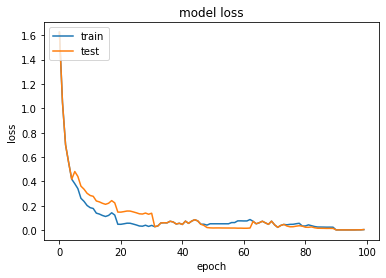

In [30]:
plt.plot(c)
plt.plot(d)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

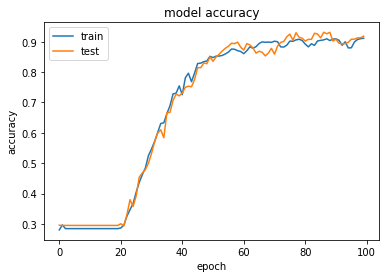

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(a)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()